In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
import math

In [3]:
#Funciones Auxiliares
def sumaV(x,y):
    '''Suma 2 vectores dados'''
    a,b=x
    c,d=y
    return (a+c,b+d)
def multV(n,a):
    '''Multiplica un vector a por una constante n'''
    a1,a2 = a
    return (a1*n,a2*n)
def rota(vect, theta):
    '''Rota un vector en un ángulo en Theta grados'''
    ang = float((theta/180.0)*math.pi)
    (x,y) = vect
    vr = ((math.cos(ang)*x)-(math.sin(ang)*y), (math.sin(ang)*x)+(math.cos(ang)*y))
    return vr
def dist(a, b):
    a1, a2 = a
    b1, b2 = b
    return math.sqrt(((b1-a1)**2)+((b2-a2)**2))

In [4]:
class Atomo:
    '''Clase que define un atomo en el sistema'''
    def __init__(self, pos, color='black'):
        '''Inicializa el objeto Atomo usando como entradas su posición (x,y) pos y su color caracteristico color'''
        self.pos = pos
        self.color = color
        self.enlaces = []

    def printAtomo(self, r, axs):
        '''Imprime un Atomo en un Patch en el axs señalado'''
        axs.add_patch(plt.Circle((self.pos), r , color=self.color))

    def setEnlace(self, atm):
        '''Enlaza 2 Atomos'''
        self.enlaces.append(atm)
        atm.enlaces.append(self)
        return 1


In [5]:
class Malla:
    '''Define una malla bidimencional formada por 2 vectores dados
Variables de Malla:
   u -> vector constructor u.
   v -> vector constructor v.
   theta -> ángulo de rotación de la malla.
   red -> lista con las pociciones de los puntos que caracterizan a cada celda de la malla.
   atms -> lista de todos los átomos en la malla
   enls -> lista de los enlaces entre átomos en la malla
   aPos -> lista auxiliar con las posiciones de todos los átomos.
   aColor -> lista auxiliar con los colores de todos los átomos.
'''
    def __init__(self, u, v, theta = 0.0):
        if theta==0.0:
            self.u = u
            self.v = v
        else:
            self.u = rota(u,theta)
            self.v = rota(v,theta)
        self.theta = theta
        self.red = []
        self.atms = []
        self.enls = []
        self.aPos, self.aCol = [], []

    def printWeb(self, axs):
        '''Imprime la red de simetrias de la malla'''
        if self.red == []: 
            print("Aun no se ha creado una red, use el método creaNM(n,m)")
            return
        lis = np.array(self.red)
        xs, ys = lis[:,0], lis[:,1]        
        mx = np.amax(xs)
        my = np.amax(ys)
        axs.set(xlim=(-mx,mx), ylim = (-my,my))
        '''plt.scatter(xs, ys,s=10)'''
        ln = []
        for p in self.red:
            ln.append([p,sumaV(p,self.u)])
            ln.append([p,sumaV(p,self.v)])
        lc = mc.LineCollection(np.array(ln), colors='darkgrey', linewidths=(0.5))
        axs.add_collection(lc)
        return ln
    
    def creaNM(self, n, m):
        '''Crea una red que se repite n veces en el vector u y m en el vector v en ambas direcciones'''
        red = []
        for i in range((2*n)+1):
            a = i-n
            for j in range((2*m)+1):
                b = j-m
                p = sumaV((multV(a,self.u)), (multV(b,self.v)))
                self.red.append(p)
        return self.red

    def creaAtomos(self, nAtms, colors=['blue','blue']):
        '''Crea la lista de los Átomos que están en la malla. La variable nAtms indica el numero de atomos en cada celda de la malla.
Si la variable nAtms es 1 entonces se forma una estructura de cuadrada.
Si la variable nAtms es 2 entonces se forma una estructura de exagonal.'''
        if nAtms == 1:#Crea una red de atomos con patrones cuadrados
            u = self.u#multV((1/2),self.u)
            v = self.v#multV((1/2),self.v)
            for p in self.red:
                p1 = p
                self.atms.append(Atomo(p1,colors[0]))
                self.aPos.append(p1)
                self.aCol.append(colors[0])
                p2 = sumaV(p1, self.u)
                p3 = sumaV(p1, self.v)
                self.enls.append([p1,p2])
                self.enls.append([p1,p3])
            return 1
        if nAtms == 2:#Crea una red de atomos con patrones exagonales 
            u = multV((1/3),self.u)
            v = multV((1/3),self.v)
            for p in self.red:
                p1 = sumaV(p,sumaV(u,v))
                self.atms.append(Atomo(p,colors[0]))
                self.aPos.append(p)
                self.aCol.append(colors[0])
                self.atms.append(Atomo(p1,colors[1]))
                self.aPos.append(p1)
                self.aCol.append(colors[1])
                p3 = sumaV(p,self.u)
                p4 = sumaV(p,self.v)
                self.enls.append([p,p1])
                self.enls.append([p1,p3])
                self.enls.append([p1,p4])
            return 1
        self.atms, self.enls = [], []
        self.aPos, self.aCol = [], []
        return 0
    
    def crea(self, n, m, nAtms, colors=['blue','blue']):
        '''Crea una red n*m y sus atomos'''
        self.creaNM(n,m)
        self.creaAtomos(nAtms, colors)


In [6]:
def muestra(mallas, t = 0.5, name = '',mm = None):
    '''Impime en pantalla la lista de Mallas dadas, puede señalarse un grosor de dibujo t y un nombre name
De tener nombre se creará una imagén con dicho nombre'''
    fig, axs = plt.subplots()
    atms, enls, col = [], [], []
    i = 0
    for m in mallas:
        i+=1
        print("Malla",i,":",len(m.aPos),"atomos,",len(m.enls),"enlaces")
        atms = atms+m.aPos
        col = col+m.aCol
        enls = enls+m.enls
    print("\tTotal:",len(atms),"atomos,",len(enls),"enlaces")
    lis = np.array(atms)
    xs, ys = lis[:,0], lis[:,1]
    axs.scatter(xs,ys, color=col,s=t)
    lc = mc.LineCollection(np.array(enls), colors='black', linewidths=(t/10))
    axs.add_collection(lc)
    if (mm is not None):
        mm.printWeb(axs)
    #axs.axes.xaxis.set_visible(False)
    #axs.axes.yaxis.set_visible(False)
    axs.autoscale_view(tight=False)
    if name!='':
        plt.savefig(name,dpi=900, bbox_inches='tight')
    plt.show()
    axs.cla()
    plt.clf()
    plt.close()
    return 1

In [7]:
def busca(vectU,vectV,factor,rango,eps):
    res = []
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    for i in range(60*factor):
        th = (i+(0*factor))/factor
        ang = math.radians(th)
        cos = math.cos(ang)
        sen = math.sin(ang)
        ru, rv = rota(vectU,th), rota(vectV,th)
        for a in range(rango):
            for b in range(rango):
                if (th%60!=0):
                    if (a!=0)and(b!=0):
                        c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                        d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                        r1 = sumaV(multV(a,vectU),multV(b,vectV))
                        r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                        #(e1,e2) = sumaV(r1,multV(-1,r2))
                        #err = max(abs(e1),abs(e2))
                        err = dist(r1,r2)
                        if err<eps:
                            res.append([a,b,round(c),round(d),round(th%60,3),err])
                            print("(a,b)=",(a,b)," (c,d)=",(round(c),round(d)),"Theta=",round(th%60,3),"err:",err)
    return res
def nvm(u,v,a,b,ang=60):
    mu = sumaV(multV(a,u),multV(b,v))
    mv = rota(mu,ang)
    return mu, mv

def sub(u, v, n, m):
    p1 = sumaV(multV(m,u),multV(n,v))
    p2 = sumaV(multV(-n,u),multV(n+m,v))
    return p1, p2

In [8]:
l = 1
h = l*math.sqrt(3)
u, v = (h,-l),(h,l)
th = 9.43
malla = Malla(u, v)
malla.crea(21,21,2,colors=['red','darkgreen']);
mallaR = Malla(u, v, theta=th)
mallaR.crea(21,21,2,colors=['darkred','darkblue']);

Malla 1 : 3698 atomos, 5547 enlaces
	Total: 3698 atomos, 5547 enlaces


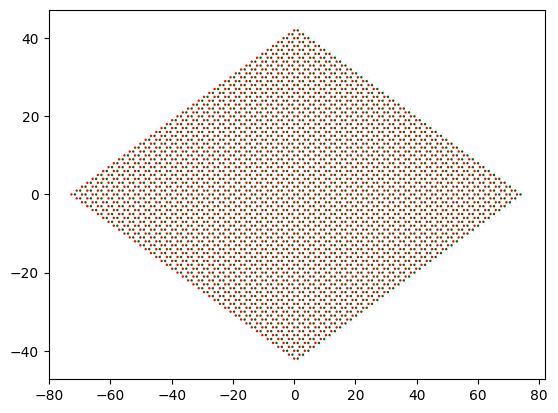

1

In [9]:
muestra([malla],name='malla0.png')

Malla 1 : 3698 atomos, 5547 enlaces
	Total: 3698 atomos, 5547 enlaces


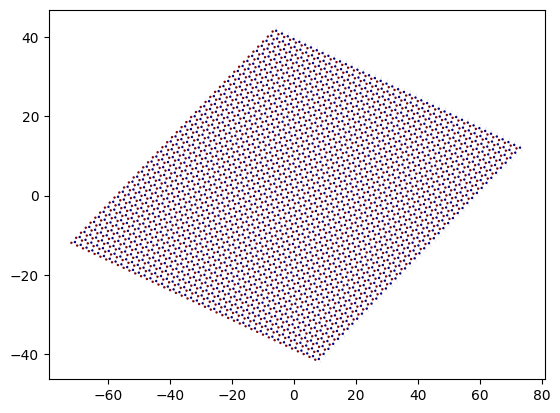

1

In [9]:
muestra([mallaR],name='malla0R.png')

Malla 1 : 3698 atomos, 5547 enlaces
Malla 2 : 3698 atomos, 5547 enlaces
	Total: 7396 atomos, 11094 enlaces


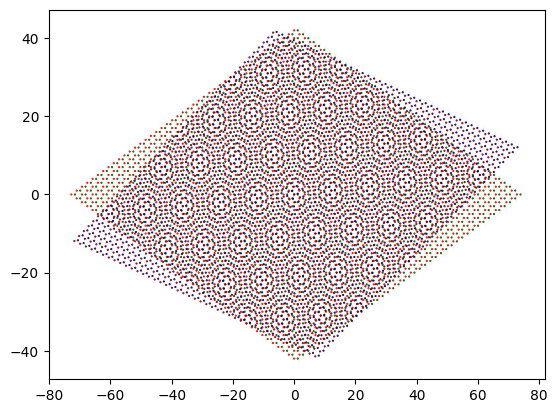

1

In [10]:
#Mostramos el empalme de la primer red con su rotada
nombre = "ejemplo(th="+str(th)+").png"
muestra([malla,mallaR],t=0.3,name=nombre)

Malla 1 : 3698 atomos, 5547 enlaces
	Total: 3698 atomos, 5547 enlaces


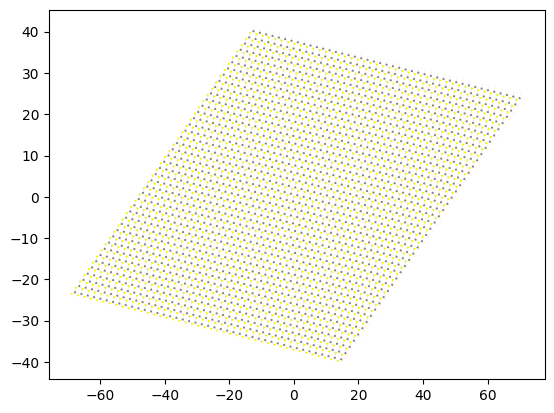

1

In [11]:
th2 = 2*th
mallaR2 = Malla(u, v, theta=th2)
mallaR2.crea(21,21,2,colors=['yellow','grey']);
muestra([mallaR2],t=0.3,name='malla0r2')

Malla 1 : 3698 atomos, 5547 enlaces
Malla 2 : 3698 atomos, 5547 enlaces
	Total: 7396 atomos, 11094 enlaces


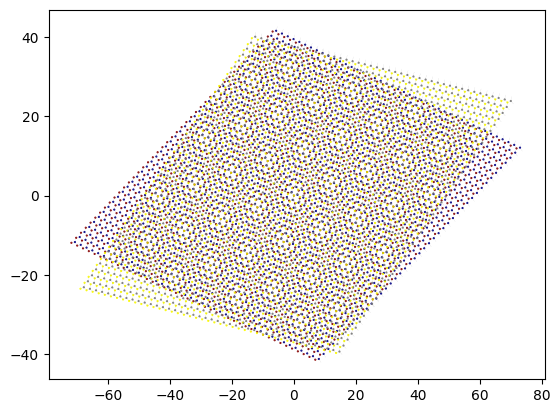

1

In [12]:
nombre = "ejemplo2(th="+str(th)+").png"
muestra([mallaR,mallaR2],t=0.3,name=nombre)

Malla 1 : 3698 atomos, 5547 enlaces
Malla 2 : 3698 atomos, 5547 enlaces
Malla 3 : 3698 atomos, 5547 enlaces
	Total: 11094 atomos, 16641 enlaces


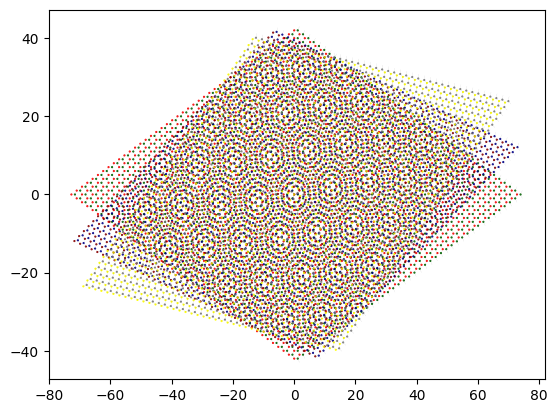

1

In [13]:
nombre = "ejemplo2(th="+str(th)+",th2="+str(th2)+").png"
muestra([malla,mallaR,mallaR2],t=0.3,name=nombre)

Malla 1 : 3698 atomos, 5547 enlaces
Malla 2 : 3698 atomos, 5547 enlaces
	Total: 7396 atomos, 11094 enlaces


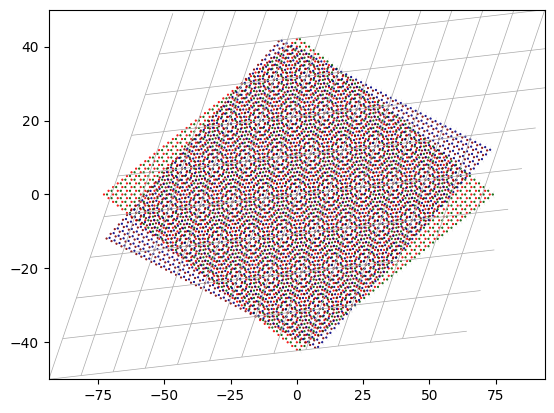

1

In [14]:
u2,v2=nvm(u,v,3,4)
u2, v2
redM1 = Malla(u2,v2)
redM1.crea(6,4,1,colors=['black','black'])
muestra([malla,mallaR],t=0.3,name='ejemplo1cmalla.png',mm=redM1)

Malla 1 : 3698 atomos, 5547 enlaces
Malla 2 : 3698 atomos, 5547 enlaces
	Total: 7396 atomos, 11094 enlaces


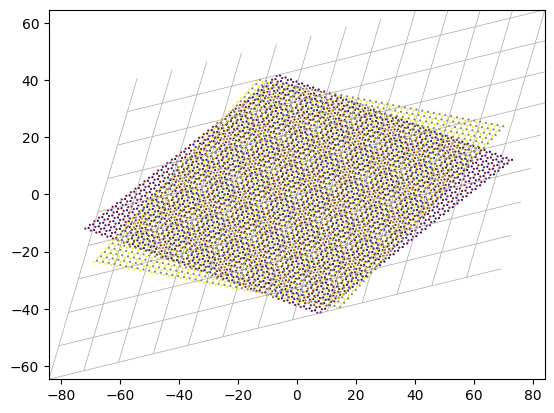

1

In [15]:
u2,v2=nvm(u,v,3,4)
u2, v2
redM2 = Malla(u2,v2,theta=th)
redM2.crea(6,4,1,colors=['black','black'])
muestra([mallaR,mallaR2],t=0.3,name='ejemplo2cmalla.png',mm=redM2)

Malla 1 : 3698 atomos, 5547 enlaces
Malla 2 : 3698 atomos, 5547 enlaces
Malla 3 : 3698 atomos, 5547 enlaces
Malla 4 : 117 atomos, 234 enlaces
Malla 5 : 117 atomos, 234 enlaces
	Total: 11328 atomos, 17109 enlaces


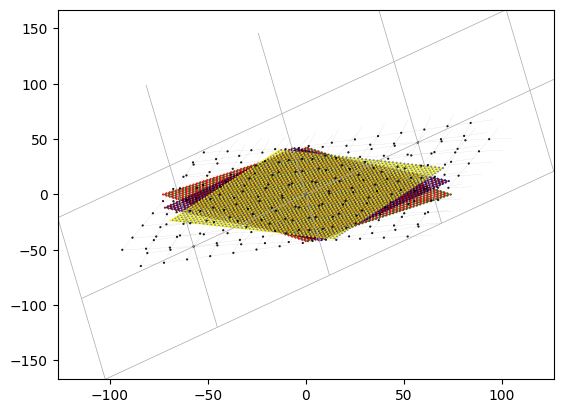

1

In [16]:
u3,v3=nvm(u2,v2,3,4)
redM3 = Malla(u3,v3)
redM3.creaNM(2,1)
muestra([malla,mallaR,mallaR2,redM1,redM2],t=0.3,name='ejemplo3cmalla.png',mm=redM3)

Malla 1 : 117 atomos, 234 enlaces
Malla 2 : 117 atomos, 234 enlaces
	Total: 234 atomos, 468 enlaces


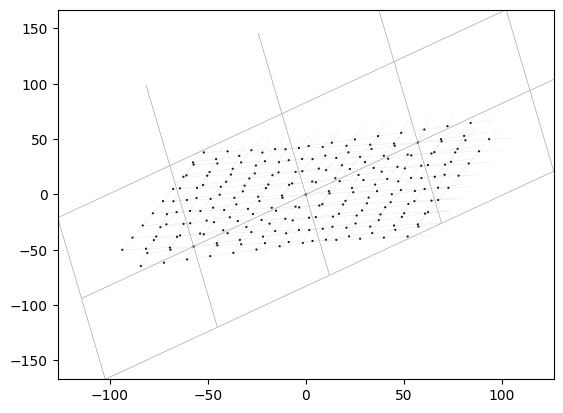

1

In [17]:
muestra([redM1,redM2],t=0.3,name='ejemplo4cmalla.png',mm=redM3)

In [10]:
l = 1
h = l*math.sqrt(3)
u, v = (h,-l), (h,l)
resultados = busca(u,v,100,40,0.00001);

(a,b)= (1, 26)  (c,d)= (6, 23) Theta= 9.43 err: 7.318903119996485e-06
(a,b)= (2, 15)  (c,d)= (5, 13) Theta= 9.43 err: 4.442405706395334e-06
(a,b)= (3, 4)  (c,d)= (4, 3) Theta= 9.43 err: 1.679071531031353e-06
(a,b)= (4, 30)  (c,d)= (10, 26) Theta= 9.43 err: 8.884811412790668e-06
(a,b)= (5, 19)  (c,d)= (9, 16) Theta= 9.43 err: 6.053978499494103e-06
(a,b)= (6, 8)  (c,d)= (8, 6) Theta= 9.43 err: 3.358143062062706e-06
(a,b)= (8, 23)  (c,d)= (13, 19) Theta= 9.43 err: 7.694472388172137e-06
(a,b)= (9, 12)  (c,d)= (12, 9) Theta= 9.43 err: 5.037214593541185e-06
(a,b)= (10, 1)  (c,d)= (11, -1) Theta= 9.43 err: 2.908237200604095e-06
(a,b)= (11, 27)  (c,d)= (17, 22) Theta= 9.43 err: 9.348674631812604e-06
(a,b)= (12, 16)  (c,d)= (16, 12) Theta= 9.43 err: 6.716286124125412e-06
(a,b)= (13, 5)  (c,d)= (15, 2) Theta= 9.43 err: 4.442405704006474e-06
(a,b)= (15, 20)  (c,d)= (20, 15) Theta= 9.43 err: 8.395357652355231e-06
(a,b)= (16, 9)  (c,d)= (19, 5) Theta= 9.43 err: 6.05397849915236e-06
(a,b)= (19, 13) 

In [45]:
[a,b,c,d,th,er]=resultados[2]
l = 1
h = l*math.sqrt(3)
u, v = (h,-l),(h,l)
m1 = Malla(u, v)
m2 = Malla(u, v, theta=th)
m1.crea(21,21,2,colors=['darkred','grey'])
m2.crea(21,21,2,colors=['darkblue','darkgreen'])
u2, v2 = sub(u,v,b,a)#nvm(u,v,a,b,ang=th)
redM1 = Malla(u2,v2)
redM1.crea(6,6,1,colors=['black','black'])
u1=sumaV(multV(a,u),multV(b,v))
v1=rota(u1,60)
print((u1,v1),(u2,v2))

((12.12435565298214, 1), (5.196152422706634, 11.0)) ((12.12435565298214, 1), (5.196152422706632, 11))


Malla 1 : 3698 atomos, 5547 enlaces
	Total: 3698 atomos, 5547 enlaces


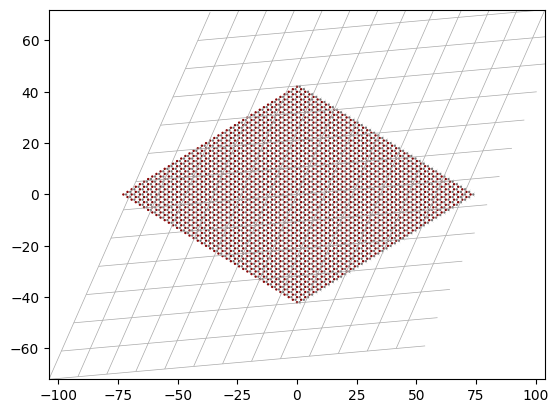

1

In [46]:
muestra([m1],name='cosa2',mm=redM1)

Malla 1 : 169 atomos, 338 enlaces
	Total: 169 atomos, 338 enlaces


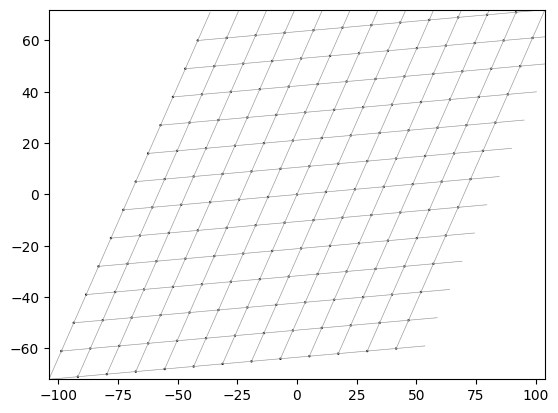

1

In [47]:
u3, v3 = nvm(u,v,a,b)
redM2 = Malla(u3,v3)
redM2.crea(6,6,1,colors=['blue','black'])
muestra([redM1],name='cosa2',mm=redM2)

In [37]:
l = 1
h = l*math.sqrt(3)
a,b = 12,13
th = 2.64
(u1,u2) = u
(v1,v2) = v
ax1 = (u2*v1)-(u1*v2)
ax2 = (u1*v1)+(u2*v2)
ax3 = (v1*v1)+(v2*v2)
ax3 = (u1*u1)+(u2*u2)
u, v = (h,-l), (h,l)
ang = math.radians(th)
cos = math.cos(ang)
sen = math.sin(ang)
ru, rv = rota(u,th), rota(v,th)
c = (a*(ax1*cos-ax2*sen) - b*(ax3*sen))/ax1
d = (b*(ax1*cos+ax2*sen) + a*(ax3*sen))/ax1
c,d = round(c),round(d)
r1=sumaV(multV(a,u),multV(b,v))
r2=sumaV(multV(c,ru),multV(d,rv))
r3=sumaV(r1,multV(-1,r2))
print(r1,r2,"Dif=",r3)
print(dist(r1,r2))

(43.30127018922193, 1) (43.30137307969677, 0.9955347371697183) Dif= (-0.00010289047484235425, 0.004465262830281702)
0.004466448095893272


In [23]:
l = 1
h = l*math.sqrt(3)
a,b = 2,3
th = 13.17
(u1,u2) = u
(v1,v2) = v
ax1 = (u2*v1)-(u1*v2)
ax2 = (u1*v1)+(u2*v2)
ax3 = (v1*v1)+(v2*v2)
ax3 = (u1*u1)+(u2*u2)
u, v = (h,-l), (h,l)
ang = math.radians(th)
cos = math.cos(ang)
sen = math.sin(ang)
ru, rv = rota(u,th), rota(v,th)
c = (a*(ax1*cos-ax2*sen) - b*(ax3*sen))/ax1
d = (b*(ax1*cos+ax2*sen) + a*(ax3*sen))/ax1
c,d = round(c),round(d)
r1=sumaV(multV(a,u),multV(b,v))
r2=sumaV(multV(c,ru),multV(d,rv))
r3=sumaV(r1,multV(-1,r2))
print(r1,r2,"Dif=",r3)
print(dist(r1,r2))

(8.660254037844386, 1) (8.66031599972463, 0.9994632484056285) Dif= (-6.196188024532034e-05, 0.0005367515943714984)
0.0005403161562121579
